<a href="https://colab.research.google.com/github/eraildes/ExData_Plotting1/blob/master/PREVENDO_PRE%C3%87O_DAS_A%C3%87%C3%95ES.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import datetime as dt
from datetime import timedelta

In [11]:
!pip install --upgrade pandas
!pip install --upgrade pandas-datareader
import numpy as np
import pandas as pd

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 109 kB 5.3 MB/s 
  Attempting uninstall: pandas-datareader
    Found existing installation: pandas-datareader 0.9.0
    Uninstalling pandas-datareader-0.9.0:
      Successfully uninstalled pandas-datareader-0.9.0


In [4]:
import matplotlib.pyplot as plt
%config InlineBackend.figure_format ='retina'  

In [5]:
import warnings
warnings.filterwarnings('ignore');

In [18]:
!pip install yfinance
import yfinance as yf
import pandas_datareader as pdr
from datetime import datetime

  

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [23]:
TWTR_amazon = yf.Ticker('AMZO34.SA')
dados_amazon = TWTR_amazon.history(period='1y')[['Open', 'High', 'Low', 'Close', 'Volume']]
dados_amazon.to_excel('amzo.xlsx')
# Passando para o Excel
TWTR_tesla = yf.Ticker('TSLA34.SA')
dados_tesla = TWTR_tesla.history(period='1y')[['Open', 'High', 'Low', 'Close', 'Volume']] 
dados_tesla.to_excel('tsla.xlsx')

In [24]:
amzo = pd.read_excel('amzo.xlsx')
# Carregar dados
tsla = pd.read_excel('tsla.xlsx')

In [25]:
# Transformar coluna "Date" em datetime
amzo['Date'] = pd.to_datetime(amzo['Date'])

# Utilizar tal coluna como o índice das linhas do DataFrame
amzo = amzo.set_index('Date')

# Mostrar 5 primeiras linhas para verificar se funcionou
amzo.head()

,Open,High,Low,Close,Volume
Date,,,,,
2021-06-21,5.6325,5.6325,5.5170,5.5250,1346340
2021-06-22,5.5250,5.5980,5.5250,5.5310,3815760
2021-06-23,5.5255,5.5605,5.5040,5.5415,1509760
2021-06-24,5.5415,5.5500,5.3675,5.3725,2177840
2021-06-25,5.4000,5.4230,5.3125,5.3375,2057240


In [26]:
# Transformar coluna "Date" em datetime
tsla['Date'] = pd.to_datetime(tsla['Date'])

# Utilizar tal coluna como o índice das linhas do DataFrame
tsla = tsla.set_index('Date')

# Mostrar 5 primeiras linhas para verificar se funcionou
tsla.head()

,Open,High,Low,Close,Volume
Date,,,,,
2021-06-21,98.400002,99.190002,96.029999,97.449997,331002
2021-06-22,97.209999,98.330002,96.760002,96.800003,203414
2021-06-23,97.459999,101.970001,97.459999,101.790001,521129
2021-06-24,103.010002,107.349998,103.010002,104.099998,666558
2021-06-25,105.900002,106.709999,103.309998,103.519997,349562


EXPLORANDO

In [27]:
# Descrever as propriedades estatísticas mais importantes
amzo.describe()

,Open,High,Low,Close,Volume
count,250.000000,250.000000,250.000000,250.000000,2.500000e+02
mean,5.268488,5.335728,5.188022,5.272634,3.304292e+06
std,0.924000,0.924532,0.924360,0.876267,4.096310e+06
min,0.000000,0.000000,0.000000,3.188500,0.000000e+00
25%,4.835750,4.931000,4.708000,4.817625,1.581725e+06
50%,5.536500,5.599250,5.491750,5.536250,2.354110e+06
75%,5.965625,6.034875,5.899500,5.956750,3.500036e+06
max,6.595000,6.675000,6.532500,6.600500,3.747524e+07


In [28]:
# Descrever as propriedades estatísticas mais importantes
tsla.describe()

,Open,High,Low,Close,Volume
count,250.000000,250.000000,250.000000,250.000000,2.500000e+02
mean,141.418160,144.510920,137.813960,141.423840,5.038311e+05
std,32.143055,32.901811,30.609164,30.553339,2.727548e+05
min,0.000000,0.000000,0.000000,94.300003,0.000000e+00
25%,115.632502,117.514997,114.049999,115.387499,3.332288e+05
50%,136.139999,139.070000,133.889999,136.344994,4.758860e+05
75%,162.997501,165.939999,159.082500,162.537502,6.098722e+05
max,216.509995,218.100006,212.910004,216.000000,1.743082e+06


In [30]:
# Analisando os índices das colunas
amzo.columns


Index(['Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')

In [31]:
# Analisando os índices das linhas
tsla.index

DatetimeIndex(['2021-06-21', '2021-06-22', '2021-06-23', '2021-06-24',
               '2021-06-25', '2021-06-28', '2021-06-29', '2021-06-30',
               '2021-07-01', '2021-07-02',
               ...
               '2022-06-07', '2022-06-08', '2022-06-09', '2022-06-10',
               '2022-06-13', '2022-06-14', '2022-06-15', '2022-06-17',
               '2022-06-20', '2022-06-21'],
              dtype='datetime64[ns]', name='Date', length=250, freq=None)

In [32]:
# Selecionando linhas específicas do DataFrame
amzo['2022']

,Open,High,Low,Close,Volume
Date,,,,,
2022-01-03,5.9775,6.1620,5.9650,6.1500,3513000
2022-01-04,6.1510,6.2150,6.0000,6.0895,2668160
2022-01-05,6.0625,6.0625,5.9345,5.9810,1559040
2022-01-06,5.9755,5.9755,5.9000,5.9250,1282100
2022-01-07,5.9250,5.9550,5.8105,5.8560,1181080
...,...,...,...,...,...
2022-06-14,3.4000,3.4300,3.3100,3.3200,2045477
2022-06-15,3.3400,3.5100,3.3400,3.4200,4945883
2022-06-17,3.4200,3.4900,3.3500,3.4700,3407436


In [33]:
# Selecionando linhas específicas do DataFrame
tsla['2021':'2022-06']

,Open,High,Low,Close,Volume
Date,,,,,
2021-06-21,98.400002,99.190002,96.029999,97.449997,331002
2021-06-22,97.209999,98.330002,96.760002,96.800003,203414
2021-06-23,97.459999,101.970001,97.459999,101.790001,521129
2021-06-24,103.010002,107.349998,103.010002,104.099998,666558
2021-06-25,105.900002,106.709999,103.309998,103.519997,349562
...,...,...,...,...,...
2022-06-14,105.930000,108.389999,101.639999,106.300003,634718
2022-06-15,106.550003,111.309998,105.080002,110.129997,696861
2022-06-17,101.820000,106.379997,101.660004,104.500000,816124


In [34]:
# Selecionando colunas específicas do DataFrame
amzo['High']

Date
2021-06-21    5.6325
2021-06-22    5.5980
2021-06-23    5.5605
2021-06-24    5.5500
2021-06-25    5.4230
               ...  
2022-06-14    3.4300
2022-06-15    3.5100
2022-06-17    3.4900
2022-06-20    3.5100
2022-06-21    0.0000
Name: High, Length: 250, dtype: float64

In [35]:
# Selecionando colunas específicas do DataFrame
tsla[['Open', 'Close']]

,Open,Close
Date,,
2021-06-21,98.400002,97.449997
2021-06-22,97.209999,96.800003
2021-06-23,97.459999,101.790001
2021-06-24,103.010002,104.099998
2021-06-25,105.900002,103.519997
...,...,...
2022-06-14,105.930000,106.300003
2022-06-15,106.550003,110.129997
2022-06-17,101.820000,104.500000


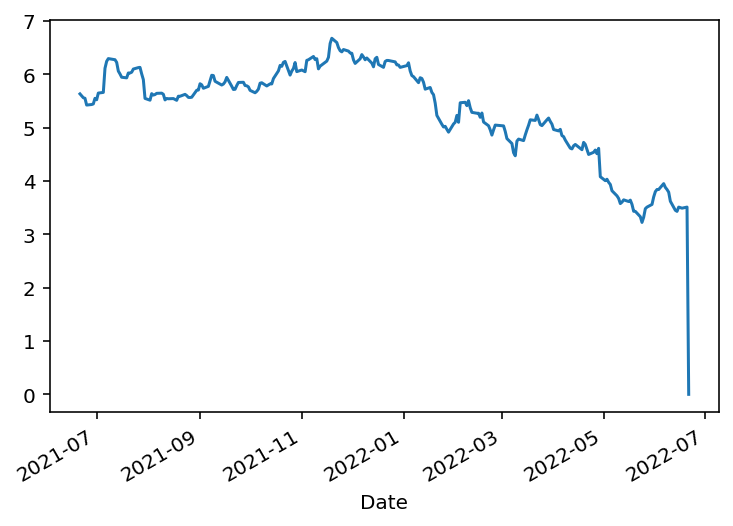

In [36]:
# Plotando curvas básicas de uma coluna específica
amzo['High'].plot()

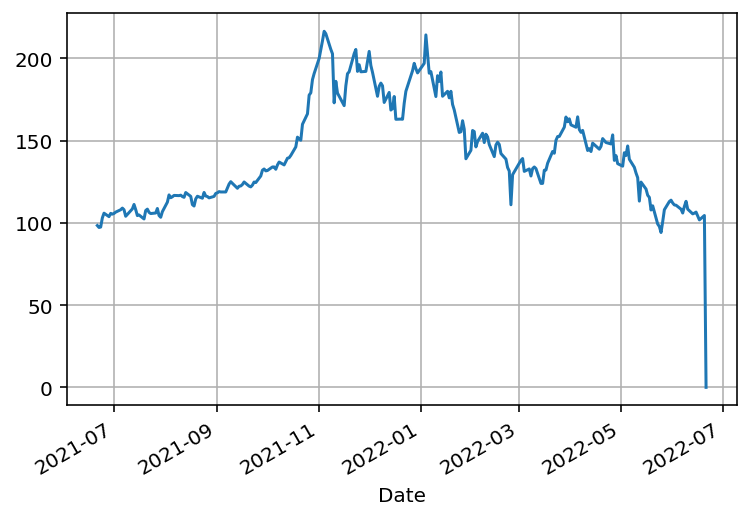

In [37]:
# Plotando curvas básicas de uma coluna específica
tsla['Open'].plot(grid=True)

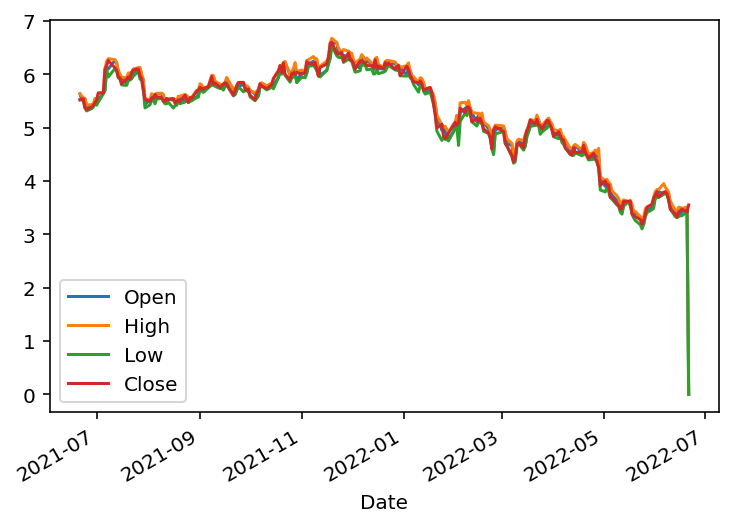

In [38]:
# Plotando curvas básicas de colunas específicas
amzo[['Open', 'High', 'Low', 'Close']].plot()

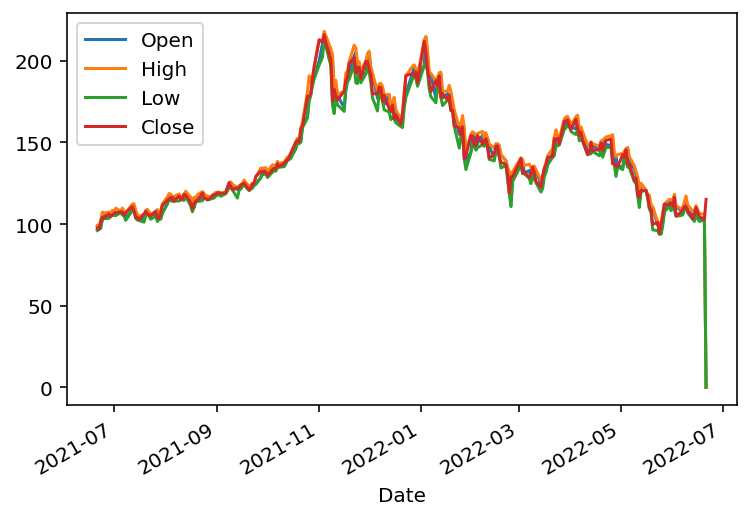

In [40]:
# Plotando curvas básicas de colunas específicas
tsla['2021-06':'2022-06'][['Open', 'High', 'Low', 'Close']].plot()

Manipulação de dados

In [42]:
# Verificando dados não existentes
amzo.isnull()
amzo.isnull().sum()

Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

In [43]:
tsla.isnull()
tsla.isnull().sum()

Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

In [44]:
# Verificando dados sujos
sujos_amzo = amzo['Volume'] == 0
sujos_amzo.sum()

2

In [45]:
sujos_tsla = tsla['Volume'] == 0
sujos_tsla.sum()

2

In [46]:
# Filtrando dados sujos
amzo[sujos_amzo] # apenas dados sujos
amzo[~sujos_amzo] # apenas dados não-sujos
amzo = amzo[~sujos_amzo] # mudando o dataframe

In [47]:
# Filtrando dados sujos
tsla[sujos_tsla] # apenas dados sujos
tsla[~sujos_tsla] # apenas dados não-sujos
tsla = tsla[~sujos_tsla] # mudando o dataframe

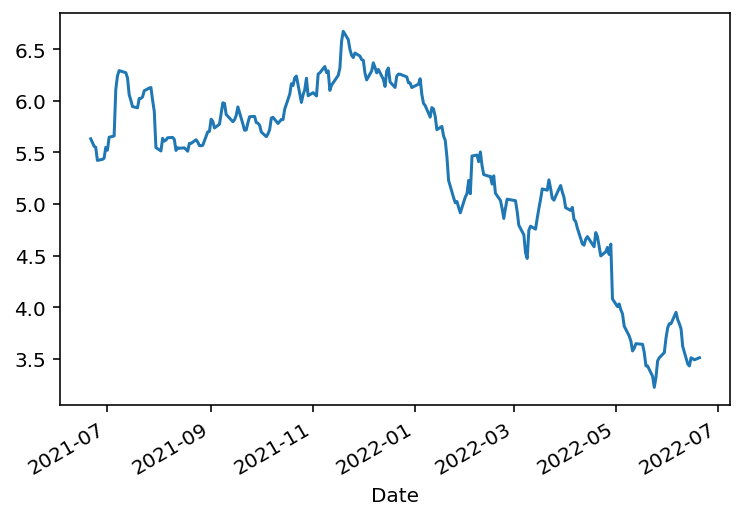

In [48]:
amzo['High'].plot()

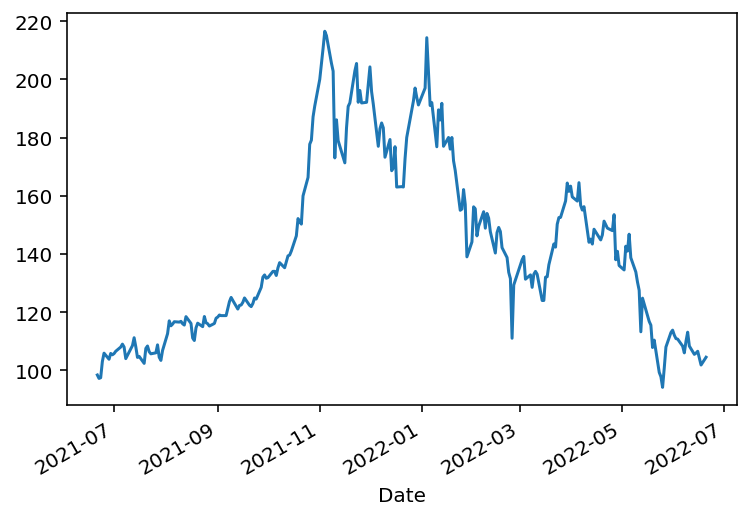

In [49]:
tsla['Open'].plot()

separando as datas. Os 75% primeiros dias serão para treino, enquanto os 25% restantes ficarão para teste.

In [57]:
def treino_teste(dados):
    # Definir quantos porcento queremos pra treino
    pct_treino = 0.75
    
    # Definir o primeiro dia, o último e o total de dias nos nossos dados
    primeiro_dia = min(dados.index)
    ultimo_dia = max(dados.index)
    total_dias = (ultimo_dia - primeiro_dia).days
    
    
    dias_treino = np.ceil(total_dias * pct_treino)
    dias_teste = np.floor(total_dias * (1 - pct_treino))
    
    # Data em que o treino deve parar
    data_parada = primeiro_dia + timedelta(days=dias_treino)
    
    # Dividir o dataset usando a data de parada do treino
    dados_treino = dados[:data_parada] # do começo à data de parada
    dados_teste = dados[data_parada:] # da data de parada ao final
    
    return dados_treino, dados_teste,data_parada

Average forecasting

Vamos começar criando uma função que retorna o y para o modelo AF:

In [56]:
def AF(X, y):
    
    # Criando lista com as médias
    y_hat_AF = []
    for i in range(len(y)):
        y_hat_AF.append(np.mean(X))
        
    # Transformando em Pandas Series
    y_hat_AF = pd.Series(y_hat_AF, index=y.index)
    return y_hat_AF

In [59]:
# Separando dados de treino, teste e data de parada
X_tsla,y_tsla,data_parada_tsla = treino_teste(tsla['Close'])
# Prevendo dados futuros com a função
y_hat_AF_tsla = AF(X_tsla, y_tsla)

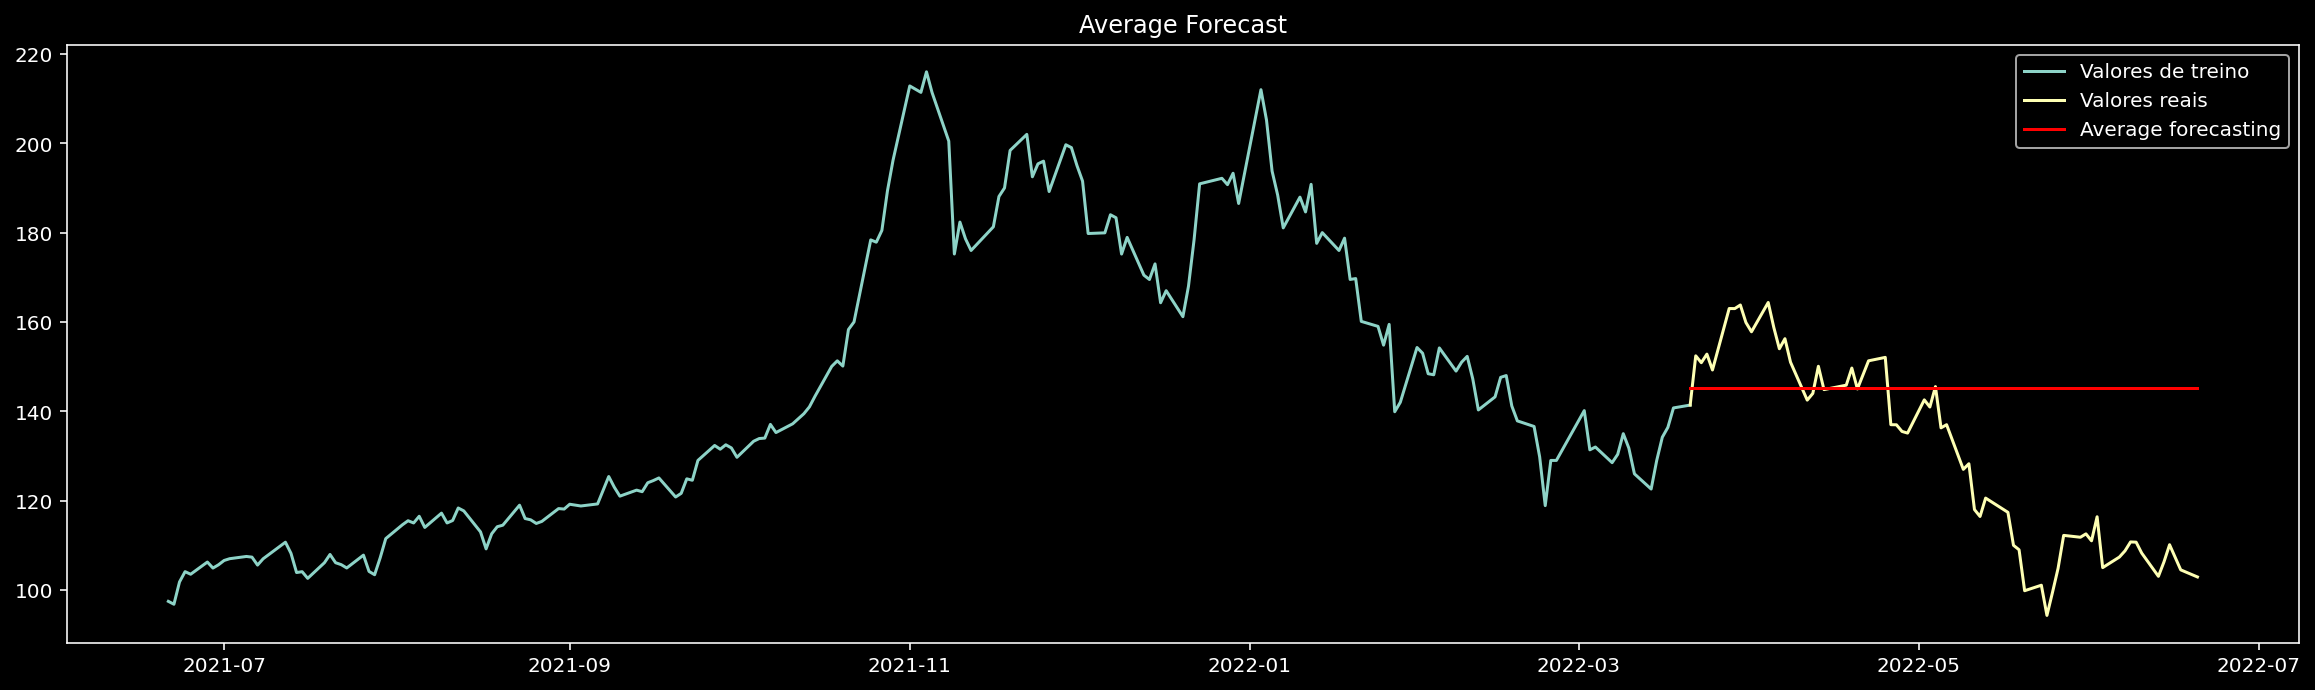

In [60]:
# Gerando gráfico com fundo escuro
with plt.style.context('dark_background'):
    plt.figure(figsize=(20, 5.5))
    plt.title("Average Forecast")
    
    # Dados reais
    plt.plot(X_tsla, label='Valores de treino')
    plt.plot(y_tsla, label='Valores reais')
    
    # Predições
    plt.plot(y_hat_AF_tsla, label='Average forecasting', color='red')
    
    plt.legend()
    plt.show()

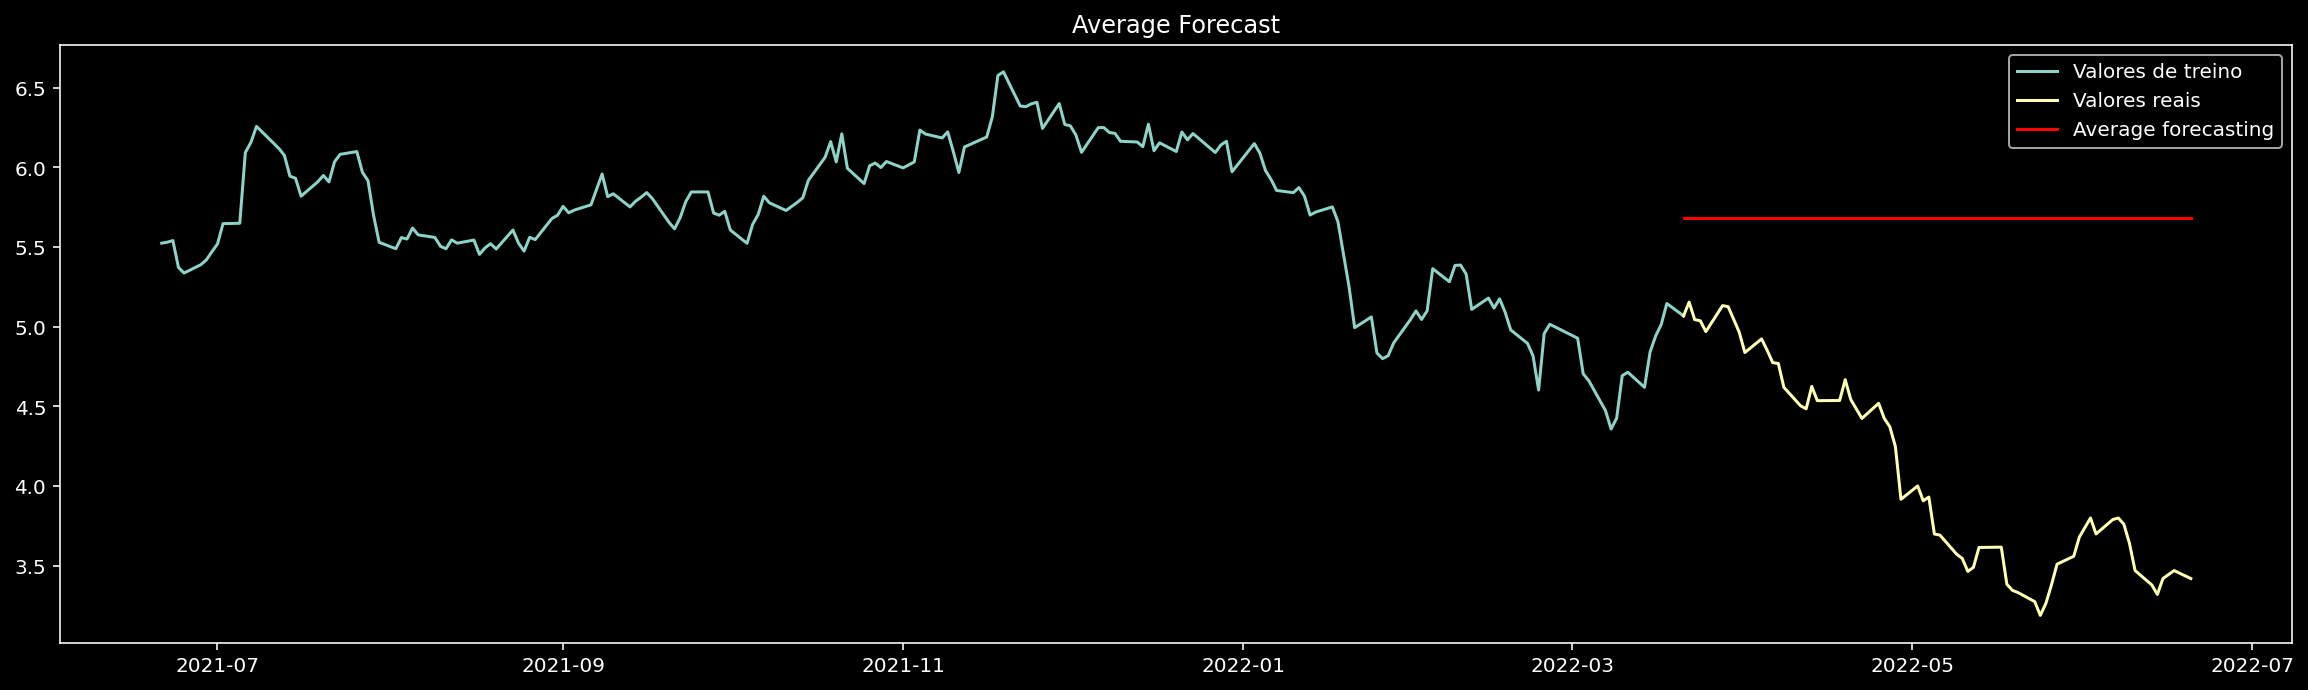

In [61]:
# Separando dados de treino, teste e data de parada
X_amzo, y_amzo, data_parada_amzo = treino_teste(amzo['Close'])
# Prevendo dados futuros com a função
y_hat_AF_amzo = AF(X_amzo, y_amzo)
# Gerando gráfico com fundo escuro
with plt.style.context('dark_background'):
    plt.figure(figsize=(20, 5.5))
    plt.title("Average Forecast")
    
    # Dados reais
    plt.plot(X_amzo, label='Valores de treino')
    plt.plot(y_amzo, label='Valores reais')
    
    # Predições
    plt.plot(y_hat_AF_amzo, label='Average forecasting', color='red')
    
    plt.legend()
    plt.show()

Drift forecast

O drift forecast assume que os dados estão distribuídos em torno de uma média constante que aumenta ou diminui constantemente no tempo.

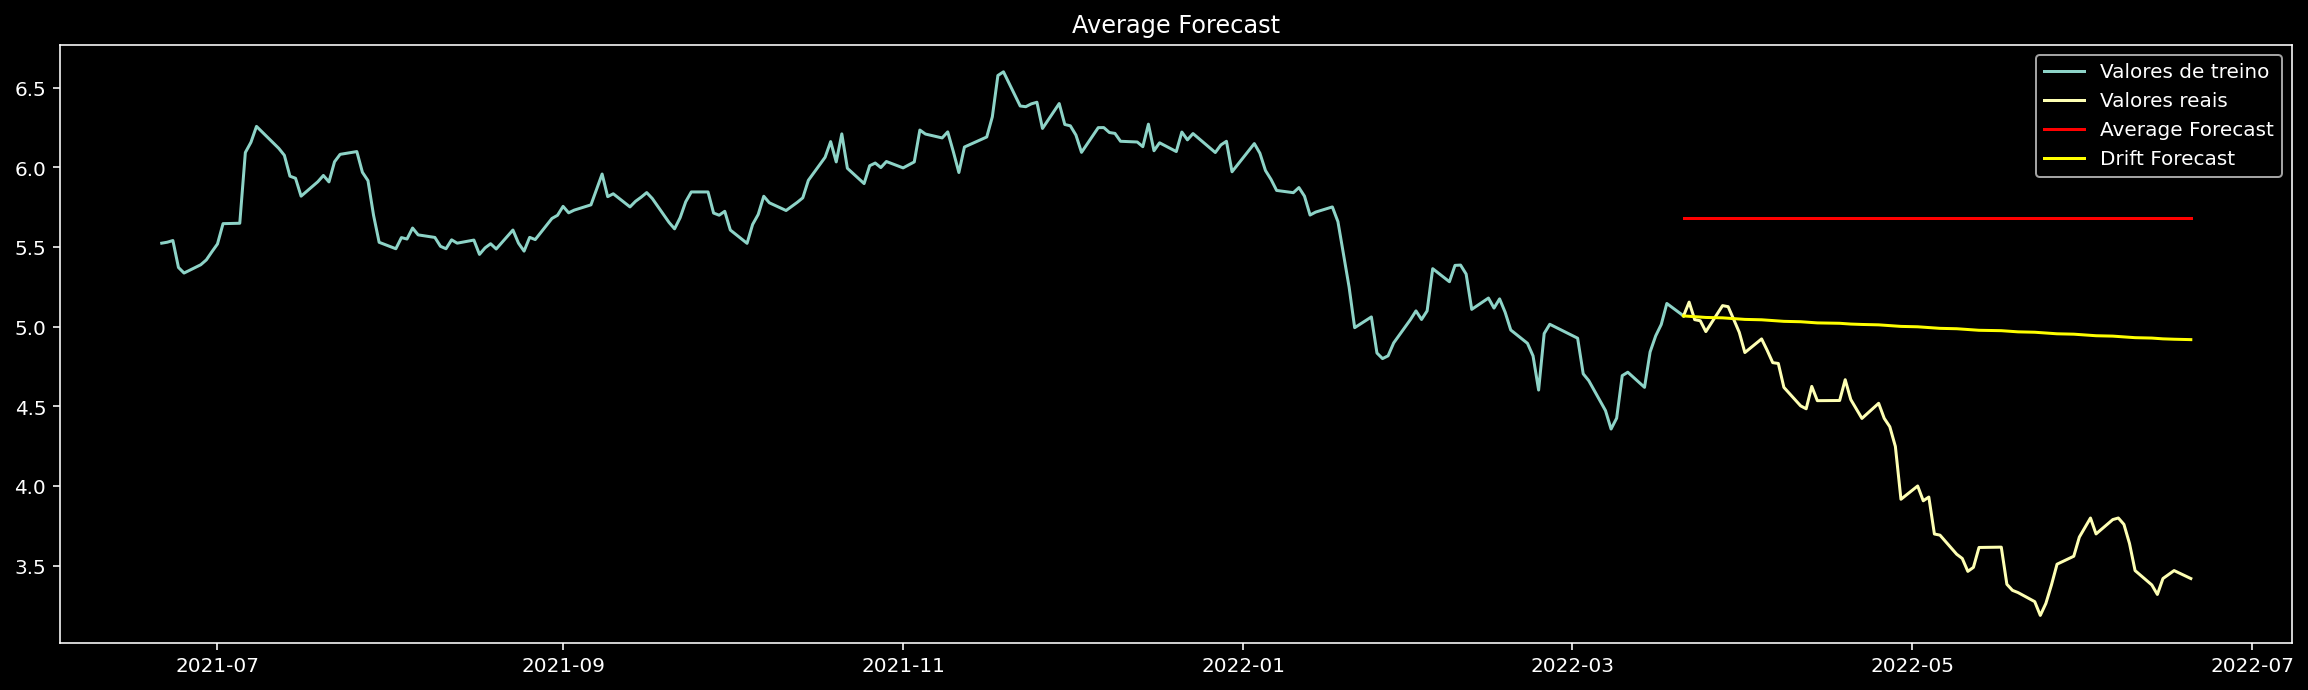

In [62]:
def DF(X, y):
    y_t = X[-1]
    m = (y_t - X[0]) / len(X)
    h = np.linspace(0,len(y.index)-1, len(y.index))
    
    # Criando lista com o resultado da fórmula
    y_hat_DF = []
    for i in range(len(y.index)):
        y_hat_DF.append(y_t + m * h[i])
    
    # Transformando em Pandas Series
    y_hat_DF = pd.Series(y_hat_DF, index=y.index)
    return y_hat_DF
# Prevendo dados futuros com a função
y_hat_DF_amzo = DF(X_amzo, y_amzo)
# Gerando gráfico com fundo escuro
with plt.style.context('dark_background'):
    plt.figure(figsize=(20, 5.5))
    plt.title("Average Forecast")
    
    # Dados reais
    plt.plot(X_amzo, label='Valores de treino')
    plt.plot(y_amzo, label='Valores reais')
    
    # Predições
    plt.plot(y_hat_AF_amzo, label='Average Forecast', color='red')
    plt.plot(y_hat_DF_amzo, label='Drift Forecast', color='Yellow')
    
    plt.legend()
    plt.show()

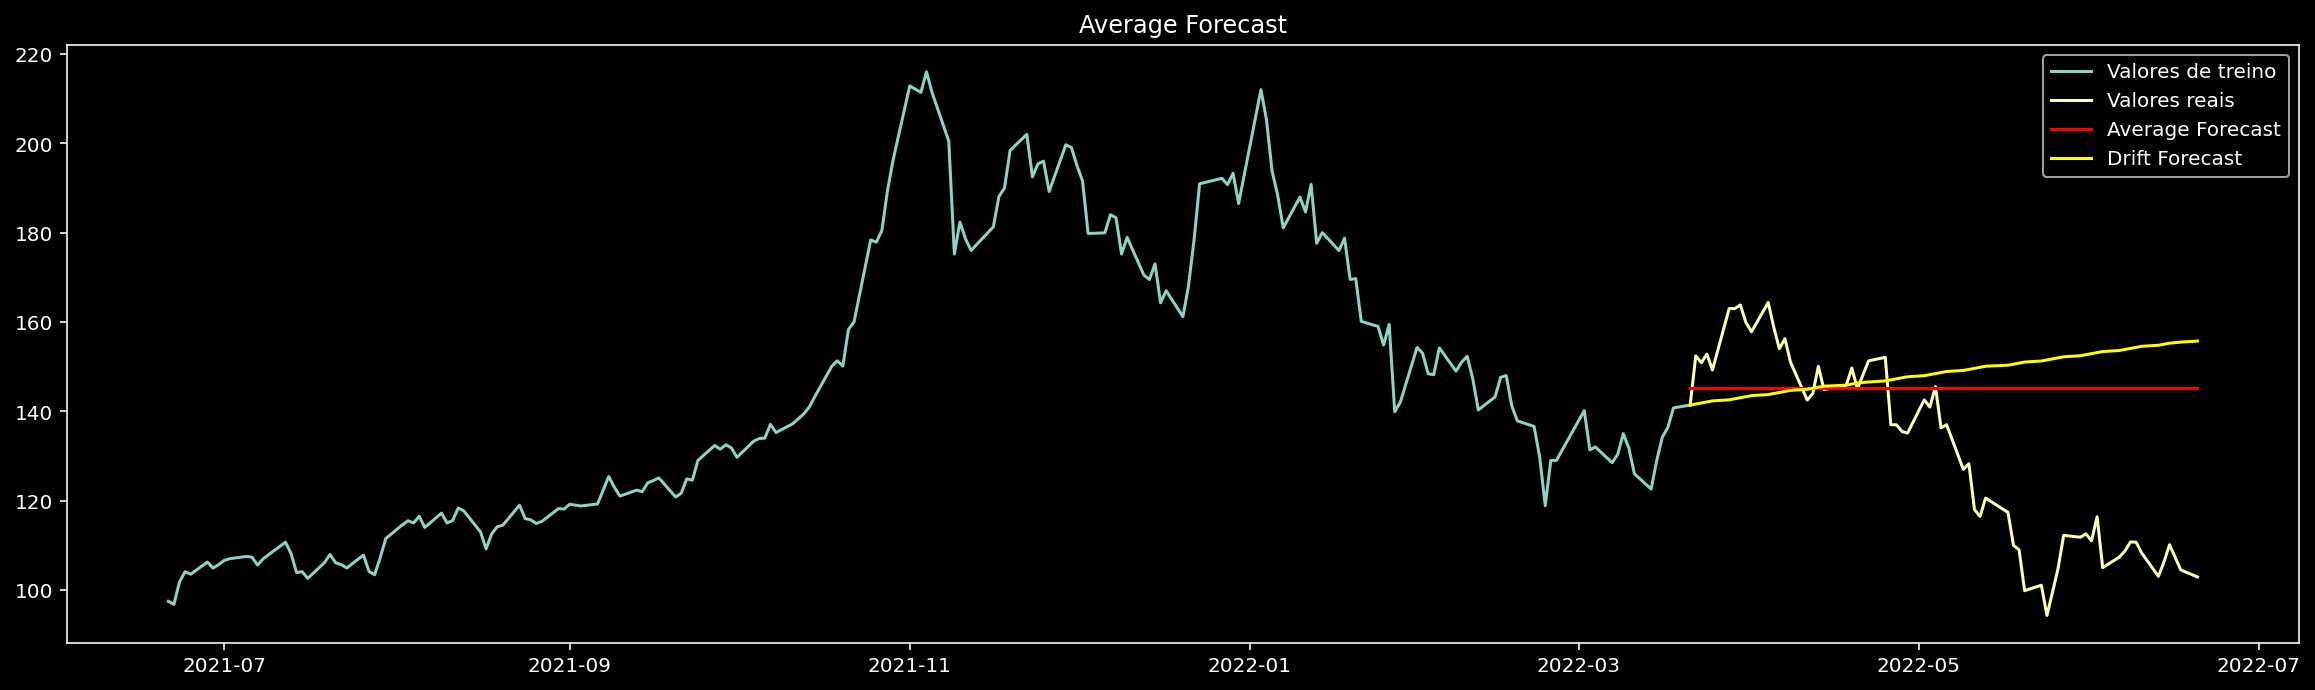

In [63]:
# Prevendo dados futuros com a função
y_hat_DF_tsla = DF(X_tsla, y_tsla)
# Gerando gráfico com fundo escuro
with plt.style.context('dark_background'):
    plt.figure(figsize=(20, 5.5))
    plt.title("Average Forecast")
    
    # Dados reais
    plt.plot(X_tsla, label='Valores de treino')
    plt.plot(y_tsla, label='Valores reais')
    
    # Predições
    plt.plot(y_hat_AF_tsla, label='Average Forecast', color='red')
    plt.plot(y_hat_DF_tsla, label='Drift Forecast', color='Yellow')
    
    plt.legend()
    plt.show()

Simple moving average

O simple moving average acompanha as médias se movendo ao longo do tempo.

Vamos começar criando uma função que retorna o y para o modelo SMA:

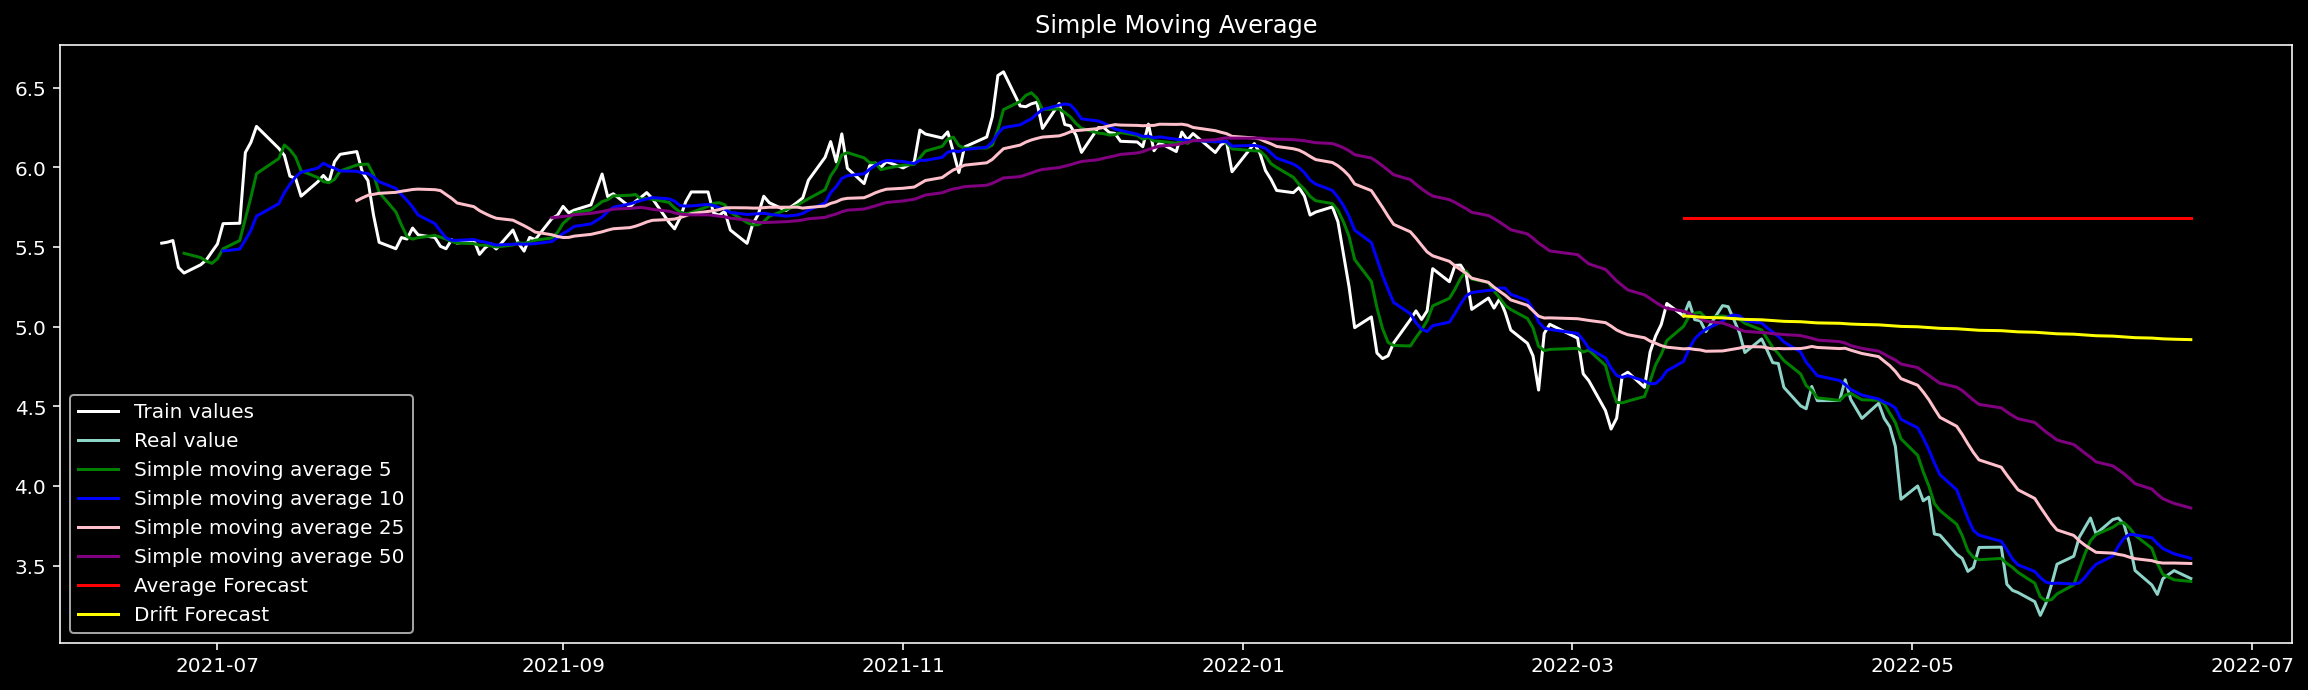

In [64]:
def SMA(dados, day):
    y_hat_SMA = dados['Close'].rolling(window=day).mean()
    return y_hat_SMA
days = [5, 10, 25, 50]
colors = ['green', 'blue', 'pink', 'purple']

# Gerando gráfico com fundo escuro 
with plt.style.context('dark_background'):
    # Configurações básicas
    plt.figure(figsize=(20, 5.5))
    plt.title("Simple Moving Average")
    
    # Dados reais
    plt.plot(X_amzo, label='Train values', color='white')
    plt.plot(y_amzo, label='Real value')
    
    # Moving average
    for i, day in enumerate(days):
        y_hat_SMA_amzo = SMA(amzo, day)
        plt.plot(y_hat_SMA_amzo, label='Simple moving average '+str(day), color=colors[i])
        
    # Previsões anteriores        
    plt.plot(y_hat_AF_amzo, label='Average Forecast', color='red')
    plt.plot(y_hat_DF_amzo, label='Drift Forecast', color='Yellow')
    
    # Configurações básicas
    plt.legend()
    plt.show()

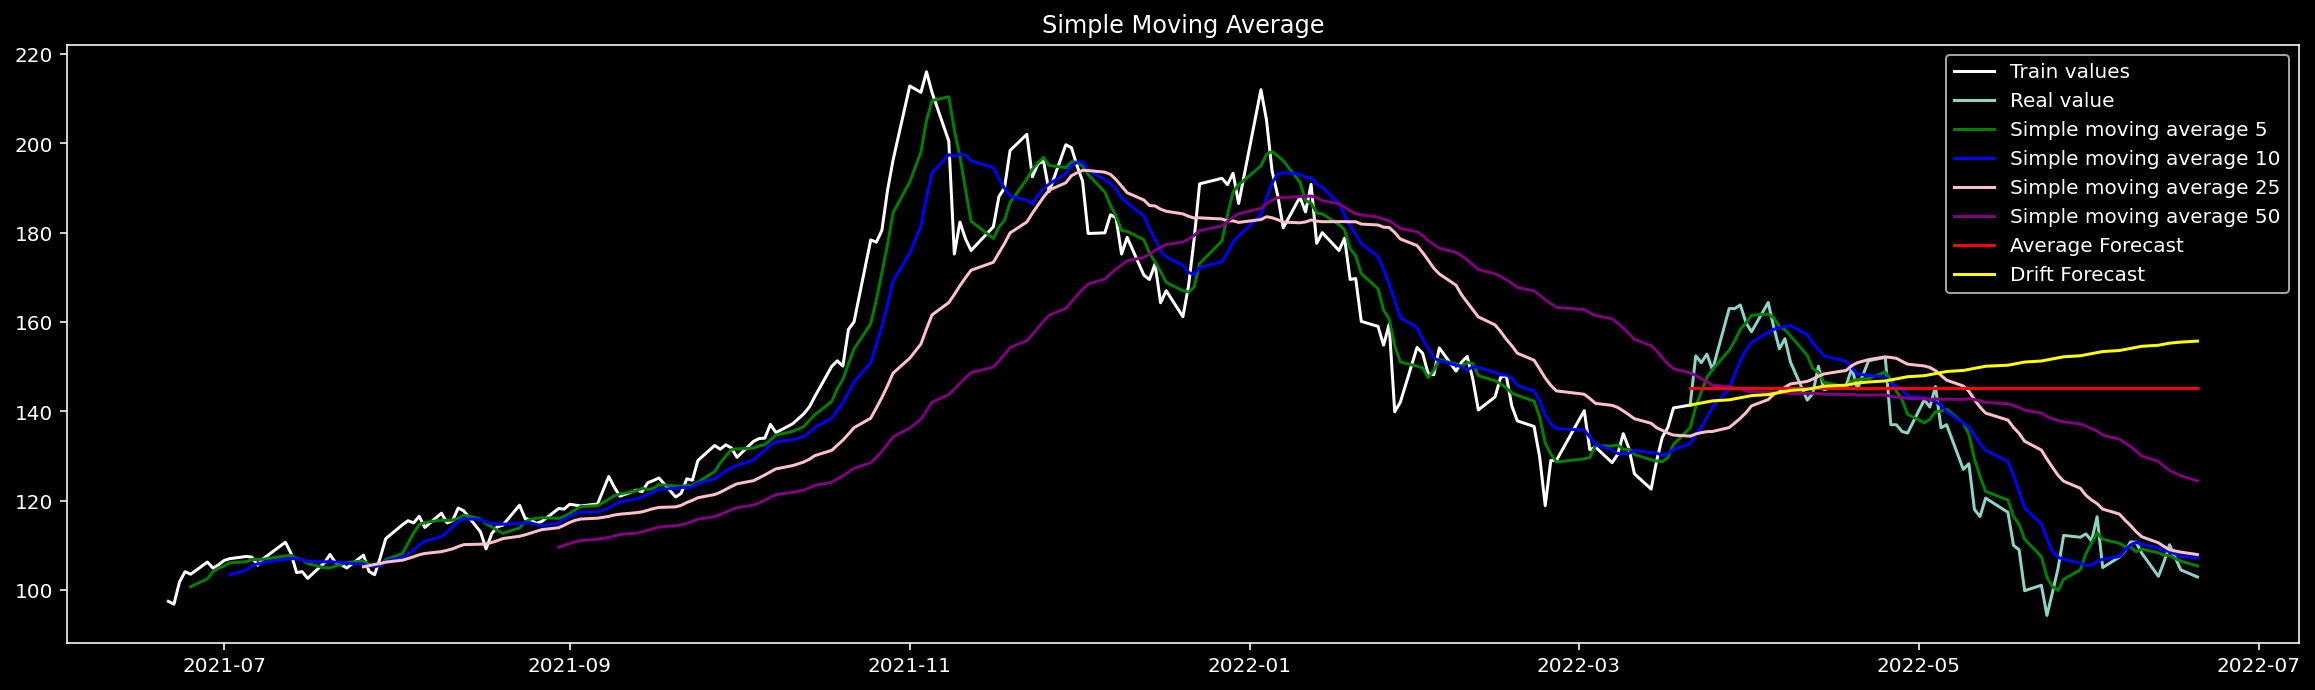

In [65]:
days = [5, 10, 25, 50]
colors = ['green', 'blue', 'pink', 'purple']

# Gerando gráfico com fundo escuro 
with plt.style.context('dark_background'):
    # Configurações básicas
    plt.figure(figsize=(20, 5.5))
    plt.title("Simple Moving Average")
    
    # Dados reais
    plt.plot(X_tsla, label='Train values', color='white')
    plt.plot(y_tsla, label='Real value')
    
    # Moving average
    for i, day in enumerate(days):
        y_hat_SMA_tsla = SMA(tsla, day)
        plt.plot(y_hat_SMA_tsla, label='Simple moving average '+str(day), color=colors[i])
        
    # Previsões anteriores        
    plt.plot(y_hat_AF_tsla, label='Average Forecast', color='red')
    plt.plot(y_hat_DF_tsla, label='Drift Forecast', color='Yellow')
    
    # Configurações básicas
    plt.legend()
    plt.show()